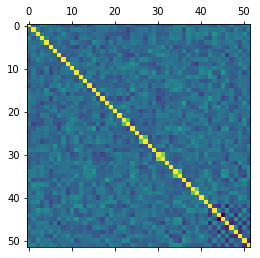

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def cleanData(filename):
	data = pd.read_csv(filename, header = 0)
	data = data.iloc[:,1:]
	data = data.dropna(axis = 1)
	cols = data.columns
	num_cols = data._get_numeric_data().columns 
	catData = list(set(cols) - set(num_cols))# detecting categorical features.
	data = data.drop(catData, axis = 1) # dropping all categorical features because they are the same for all samples.

	nunique = data.apply(pd.Series.nunique) # find out the repeat data.
	colsToDrop = nunique[nunique == 1].index
	data = data.drop(colsToDrop, axis = 1)# drop out the columns containing the same value.
	columnsNmae = data.columns # store the column name for later indexing
	return data, columnsNmae

filename = 'integratedDataset.csv'
dataset, colName = cleanData(filename)
X = dataset.iloc[:,:42]
y = dataset.iloc[:,42:]

#xcorr = y.corr()
#xcorr.style.background_gradient().set_precision(2)
plt.matshow(dataset.corr())
#plt.matshow(y.corr().style.background_gradient())
plt.savefig("correlation.jpg", dpi = 1000, format = 'jpg')
